#Ejemplo de procesamiento de lenguaje natural

In [1]:
sc.version

'2.4.5'

In [2]:
#xx= sc.textFile("https://raw.githubusercontent.com/mxw/grmr/master/src/finaltests/bible.txt")
#print( type(xx) )

In [3]:
#xx.collect()

In [4]:
#linesRDD= sc.textFile("../BIBLIACOMPLETAno.txt")
#print( type(linesRDD) )

In [5]:
#linesRDD.collect()

In [6]:
linesRDD= sc.binaryFiles("../BIBLIACOMPLETA.txt").values().flatMap(lambda x: x.decode("iso-8859-1").splitlines())
linesRDD.take(5)

['LA SANTA BIBLIA, ANTIGUO TESTAMENTO, VERSIÓN DE CASIODORO DE REINA (1569) REVISADA POR CIPRIANO DE VALERA (1602), OTRAS REVISIONES: 1862, 1909 Y 1960',
 '',
 'Parte # 1 (INCLUYE LA LEY), los 10 primeros libros del AT: Gn, Ex, Lv, Nm, Dt, Jos, Jue, Rt, 1 S y 2 S',
 '',
 '']

In [7]:
linesRDD.collect()

['LA SANTA BIBLIA, ANTIGUO TESTAMENTO, VERSIÓN DE CASIODORO DE REINA (1569) REVISADA POR CIPRIANO DE VALERA (1602), OTRAS REVISIONES: 1862, 1909 Y 1960',
 '',
 'Parte # 1 (INCLUYE LA LEY), los 10 primeros libros del AT: Gn, Ex, Lv, Nm, Dt, Jos, Jue, Rt, 1 S y 2 S',
 '',
 '',
 'LIBRO PRIMERO DE MOISÉS',
 '',
 'GÉNESIS',
 '',
 'La creación',
 '',
 'Génesis 1',
 '',
 'Génesis 1:1',
 '          En el principio creó Dios los cielos y la tierra.',
 '',
 ' Génesis 1:2',
 '          Y la tierra estaba desordenada y vacía, y las tinieblas',
 '          estaban sobre la faz del abismo, y el Espíritu de Dios se',
 '          movía sobre la faz de las aguas.',
 '',
 ' Génesis 1:3',
 '          Y dijo Dios: Sea la luz; y fue la luz.',
 '',
 ' Génesis 1:4',
 '          Y vio Dios que la luz era buena; y separó Dios la luz de',
 '          las tinieblas.',
 '',
 ' Génesis 1:5',
 '          Y llamó Dios a la luz Día, y a las tinieblas llamó Noche.',
 '          Y fue la tarde y la mañana un día.',
 ''

In [8]:
linesRDD.count()

35186

In [9]:
linesRDD.getNumPartitions()

1

In [10]:
mifilter = linesRDD.filter(lambda line: "luz" in line)
mifilter.collect()

['          Y dijo Dios: Sea la luz; y fue la luz.',
 '          Y vio Dios que la luz era buena; y separó Dios la luz de',
 '          Y llamó Dios a la luz Día, y a las tinieblas llamó Noche.',
 '          luz de las tinieblas. Y vio Dios que era bueno.',
 '          tus preñeces; con dolor darás a luz los hijos; y tu deseo',
 '          Conoció Adán a su mujer Eva, la cual concibió y dio a luz',
 '          Después dio a luz a su hermano Abel. Y Abel fue pastor de',
 '          Y conoció Caín a su mujer, la cual concibió y dio a luz a',
 '          Y Ada dio a luz a Jabal, el cual fue padre de los que',
 '          Y Zila también dio a luz a Tubal-caín, artífice de toda',
 '          Y conoció de nuevo Adán a su mujer, la cual dio a luz un',
 '7 Y la halló el ángel de Jehová junto a una fuente de agua en el desierto, junto a la fuente que está en el camino de Shur. 8 Y le dijo: Agar, sierva de Sarai, ¿de dónde vienes tú, y a dónde vas? Y ella respondió: Huyo de delante de Sarai mi s

In [11]:
# conta las palabras más frecuentes de la biblia
#function tokenin:
#    ...

In [12]:
#words= linesRDD.flatMap(lambda x: x.split(" ")) #Tokenización
#words.collect()

In [13]:
#1. Tokenización
import re
# remove any non-words and split lines into separate words
# finally, convert all words to lowercase
def splitter(line):
    line = re.sub(r'^\W+|\W+$', '', line)
    return map(str.lower, re.split(r'\W+', line))

words= linesRDD.flatMap(splitter)
words.collect()

['la',
 'santa',
 'biblia',
 'antiguo',
 'testamento',
 'versión',
 'de',
 'casiodoro',
 'de',
 'reina',
 '1569',
 'revisada',
 'por',
 'cipriano',
 'de',
 'valera',
 '1602',
 'otras',
 'revisiones',
 '1862',
 '1909',
 'y',
 '1960',
 '',
 'parte',
 '1',
 'incluye',
 'la',
 'ley',
 'los',
 '10',
 'primeros',
 'libros',
 'del',
 'at',
 'gn',
 'ex',
 'lv',
 'nm',
 'dt',
 'jos',
 'jue',
 'rt',
 '1',
 's',
 'y',
 '2',
 's',
 '',
 '',
 'libro',
 'primero',
 'de',
 'moisés',
 '',
 'génesis',
 '',
 'la',
 'creación',
 '',
 'génesis',
 '1',
 '',
 'génesis',
 '1',
 '1',
 'en',
 'el',
 'principio',
 'creó',
 'dios',
 'los',
 'cielos',
 'y',
 'la',
 'tierra',
 '',
 'génesis',
 '1',
 '2',
 'y',
 'la',
 'tierra',
 'estaba',
 'desordenada',
 'y',
 'vacía',
 'y',
 'las',
 'tinieblas',
 'estaban',
 'sobre',
 'la',
 'faz',
 'del',
 'abismo',
 'y',
 'el',
 'espíritu',
 'de',
 'dios',
 'se',
 'movía',
 'sobre',
 'la',
 'faz',
 'de',
 'las',
 'aguas',
 '',
 'génesis',
 '1',
 '3',
 'y',
 'dijo',
 'dios',
 '

In [14]:
words.count()

768703

In [15]:
#2.a Removing Stop words.  w not in stop_words and not w[0].isdigit()
stop_words={'a','su','al','la','las','de','los','es','para','porque','y','génesis', 'yo', 'que', 'en', 'como'
           ,'del', 'le', 'dijo', 'con', 'mi', 'me', 'te', 'el', 'tu', 'lo', 'ellos', 'se', 'él'
           'no', 'ni', 'he', 'ha', 'ni', 'un', 'cuando', 'si', 'sobre', 'entonces', 'sobre', 'todo', 'pero', 'no'
           ,'sus', 'así', 'por', 'tus'}
stopW = words.filter(lambda w : w not in stop_words and not w.isdigit() and len(w) != 0)
print(stopW.count())
stopW.collect()

394938


['santa',
 'biblia',
 'antiguo',
 'testamento',
 'versión',
 'casiodoro',
 'reina',
 'revisada',
 'cipriano',
 'valera',
 'otras',
 'revisiones',
 'parte',
 'incluye',
 'ley',
 'primeros',
 'libros',
 'at',
 'gn',
 'ex',
 'lv',
 'nm',
 'dt',
 'jos',
 'jue',
 'rt',
 's',
 's',
 'libro',
 'primero',
 'moisés',
 'creación',
 'principio',
 'creó',
 'dios',
 'cielos',
 'tierra',
 'tierra',
 'estaba',
 'desordenada',
 'vacía',
 'tinieblas',
 'estaban',
 'faz',
 'abismo',
 'espíritu',
 'dios',
 'movía',
 'faz',
 'aguas',
 'dios',
 'sea',
 'luz',
 'fue',
 'luz',
 'vio',
 'dios',
 'luz',
 'era',
 'buena',
 'separó',
 'dios',
 'luz',
 'tinieblas',
 'llamó',
 'dios',
 'luz',
 'día',
 'tinieblas',
 'llamó',
 'noche',
 'fue',
 'tarde',
 'mañana',
 'día',
 'luego',
 'dios',
 'haya',
 'expansión',
 'medio',
 'aguas',
 'separe',
 'aguas',
 'aguas',
 'e',
 'hizo',
 'dios',
 'expansión',
 'separó',
 'aguas',
 'estaban',
 'debajo',
 'expansión',
 'aguas',
 'estaban',
 'expansión',
 'fue',
 'llamó',
 'dio

In [16]:
#2.b Removing punctuations.
import string
list_punct=list(string.punctuation)
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
filtered_data = stopW.filter(lambda punct : punct not in list_punct)
print(filtered_data.count())
#filtered_data.collect()

394938


In [18]:
counts= filtered_data.map(lambda x: (x,1))
print(counts.count())
counts.collect()

394938


[('santa', 1),
 ('biblia', 1),
 ('antiguo', 1),
 ('testamento', 1),
 ('versión', 1),
 ('casiodoro', 1),
 ('reina', 1),
 ('revisada', 1),
 ('cipriano', 1),
 ('valera', 1),
 ('otras', 1),
 ('revisiones', 1),
 ('parte', 1),
 ('incluye', 1),
 ('ley', 1),
 ('primeros', 1),
 ('libros', 1),
 ('at', 1),
 ('gn', 1),
 ('ex', 1),
 ('lv', 1),
 ('nm', 1),
 ('dt', 1),
 ('jos', 1),
 ('jue', 1),
 ('rt', 1),
 ('s', 1),
 ('s', 1),
 ('libro', 1),
 ('primero', 1),
 ('moisés', 1),
 ('creación', 1),
 ('principio', 1),
 ('creó', 1),
 ('dios', 1),
 ('cielos', 1),
 ('tierra', 1),
 ('tierra', 1),
 ('estaba', 1),
 ('desordenada', 1),
 ('vacía', 1),
 ('tinieblas', 1),
 ('estaban', 1),
 ('faz', 1),
 ('abismo', 1),
 ('espíritu', 1),
 ('dios', 1),
 ('movía', 1),
 ('faz', 1),
 ('aguas', 1),
 ('dios', 1),
 ('sea', 1),
 ('luz', 1),
 ('fue', 1),
 ('luz', 1),
 ('vio', 1),
 ('dios', 1),
 ('luz', 1),
 ('era', 1),
 ('buena', 1),
 ('separó', 1),
 ('dios', 1),
 ('luz', 1),
 ('tinieblas', 1),
 ('llamó', 1),
 ('dios', 1),
 ('lu

In [19]:
#from operator import add
counts= counts.reduceByKey( lambda x,y: x+y)
print(counts.count())
counts.collect()

25985


[('santa', 80),
 ('biblia', 6),
 ('antiguo', 22),
 ('testamento', 6),
 ('versión', 6),
 ('casiodoro', 4),
 ('reina', 81),
 ('revisada', 4),
 ('cipriano', 4),
 ('valera', 4),
 ('otras', 87),
 ('revisiones', 4),
 ('parte', 302),
 ('incluye', 3),
 ('ley', 491),
 ('primeros', 58),
 ('libros', 14),
 ('at', 3),
 ('gn', 7),
 ('ex', 33),
 ('lv', 8),
 ('nm', 11),
 ('dt', 22),
 ('jos', 4),
 ('jue', 3),
 ('rt', 1),
 ('s', 22),
 ('libro', 203),
 ('primero', 180),
 ('moisés', 880),
 ('creación', 19),
 ('principio', 109),
 ('creó', 23),
 ('dios', 4282),
 ('cielos', 370),
 ('tierra', 2938),
 ('estaba', 731),
 ('desordenada', 1),
 ('vacía', 10),
 ('tinieblas', 142),
 ('estaban', 465),
 ('faz', 76),
 ('abismo', 35),
 ('espíritu', 628),
 ('movía', 6),
 ('aguas', 386),
 ('sea', 653),
 ('luz', 391),
 ('fue', 1318),
 ('vio', 211),
 ('era', 830),
 ('buena', 140),
 ('separó', 5),
 ('llamó', 211),
 ('día', 1465),
 ('noche', 359),
 ('tarde', 81),
 ('mañana', 288),
 ('luego', 427),
 ('haya', 254),
 ('expansión'

In [20]:
print(counts.max(lambda x: x[1])) # el más frec, pero como los 5 más frec

('jehová', 6941)


In [21]:
df = counts.toDF(["Keywords","Frequency"]) #converting RDD to spark dataframe
df.count()

25985

In [22]:
#df.toPandas()

In [23]:
from pyspark.sql.functions import col

df.groupBy("Keywords") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+---------+-----+
| Keywords|count|
+---------+-----+
|expansión|    1|
|delicioso|    1|
| guardase|    1|
|  llamada|    1|
| comieses|    1|
|  setenta|    1|
|    macho|    1|
|    entró|    1|
|   verano|    1|
|   siglos|    1|
|    elisa|    1|
|     lasa|    1|
|   tómala|    1|
|      rey|    1|
|  karnaim|    1|
|    medán|    1|
| precepto|    1|
|  lampiño|    1|
|   llegar|    1|
| listados|    1|
+---------+-----+
only showing top 20 rows



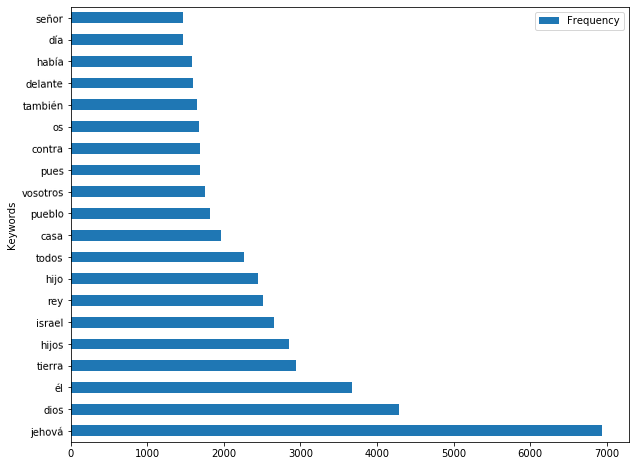

In [24]:
df.createOrReplaceTempView("myTable") 
df2 = spark.sql("SELECT Keywords, Frequency from myTable order by Frequency desc limit 20  ") #renaming columns 
pandD = df2.toPandas() #converting spark dataframes to pandas dataframes
pandD.plot.barh(x='Keywords', y='Frequency', rot=1, figsize=(10,8))

In [25]:
from wordcloud import WordCloud, STOPWORDS
#wordcloud                 1.7.0                    pypi_0    pypi

In [26]:
""" libs """
# print(__doc__)
import sys
print(sys.version)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]


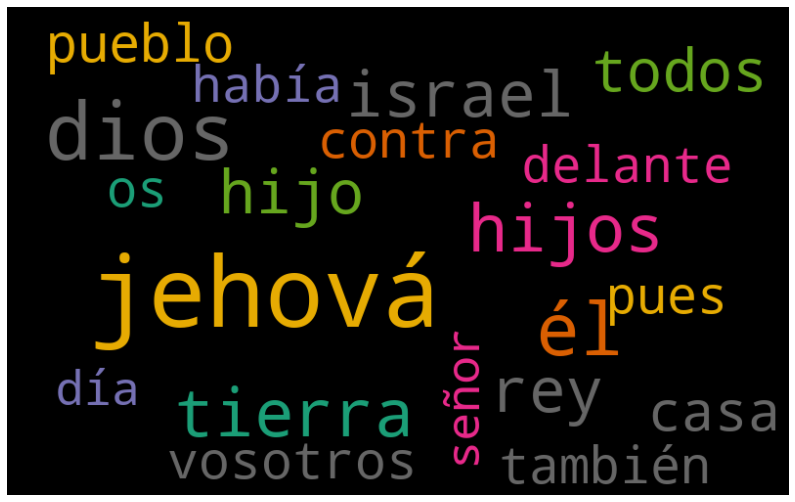

In [27]:
wordcloudConvertDF = pandD.set_index('Keywords').T.to_dict('records')
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate_from_frequencies(dict(*wordcloudConvertDF))
plt.figure(figsize=(14, 10))    
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()